# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [15]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [16]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [17]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [18]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="AP" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront.n

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

Ini adalah step dimana kita mencari code dari data yang ingin kita ambil melalui website "https://www.exchange-rates.org/history/IDR/USD/T". Kunci dapat ditemukan dengan meng-inspect datanya dengan menggunakan "right click" dan inspect. Code yang harus kita ambil adalah code dimana semua informasi yang kita butuhkan ter-highlight saat kita sedang melakukan inspeksi pada element dari data yang kita perlukan. 


In [19]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])


table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/4/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-4-2021">
     14,261.85426
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-4-2021">
     USD IDR rate for 3/4/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/3/2021
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/ID


In [20]:
tr = table.find_all('tr',attrs={'class':""})
tr[:5]

[<tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>,
 <tr><td>3/3/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a></td></tr>,
 <tr><td>3/2/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-2-2021">14,256.28041</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-2-2021">USD IDR rate for 3/2/2021</a></td></tr>,
 <tr><td>3/1/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/3-1-2021">14,248.60576</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-1-2021">USD IDR rate for 3/1/2021</a></td></tr>,
 <tr><td>2/26/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/2-26-2021">14,300.27815</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/R

In [21]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr',attrs={'class':""})[i]
    
    #get date
    date = row.find_all('td')[0].text
    date = date.strip() #for removing the excess whitespace
    
    #get day
    day = row.find_all('td')[1].text
    day = day.strip() #for removing the excess whitespace
    
    #get IDR rate
    idr = row.find_all('td')[2].text
    idr = idr.strip() #for removing the excess whitespace
    
    #get remarks
    remarks = row.find_all('td')[3].text
    remarks = remarks.strip() #for removing the excess whitespace
    
    temp.append((date,day,idr,remarks))
temp

[('3/3/2021', 'Wednesday', '14,257.29443 IDR', 'USD IDR rate for 3/3/2021'),
 ('3/2/2021', 'Tuesday', '14,256.28041 IDR', 'USD IDR rate for 3/2/2021'),
 ('3/1/2021', 'Monday', '14,248.60576 IDR', 'USD IDR rate for 3/1/2021'),
 ('2/26/2021', 'Friday', '14,300.27815 IDR', 'USD IDR rate for 2/26/2021'),
 ('2/25/2021', 'Thursday', '14,139.73096 IDR', 'USD IDR rate for 2/25/2021'),
 ('2/24/2021', 'Wednesday', '14,083.03673 IDR', 'USD IDR rate for 2/24/2021'),
 ('2/23/2021', 'Tuesday', '14,092.64503 IDR', 'USD IDR rate for 2/23/2021'),
 ('2/22/2021', 'Monday', '14,118.07274 IDR', 'USD IDR rate for 2/22/2021'),
 ('2/19/2021', 'Friday', '14,066.79375 IDR', 'USD IDR rate for 2/19/2021'),
 ('2/18/2021', 'Thursday', '14,013.51318 IDR', 'USD IDR rate for 2/18/2021'),
 ('2/17/2021', 'Wednesday', '14,015.16095 IDR', 'USD IDR rate for 2/17/2021'),
 ('2/16/2021', 'Tuesday', '13,935.96629 IDR', 'USD IDR rate for 2/16/2021'),
 ('2/15/2021', 'Monday', '13,918.18725 IDR', 'USD IDR rate for 2/15/2021'),
 (

In [22]:
temp = temp [::-1]
temp

[('9/6/2020', 'Sunday', '14,754.95155 IDR', 'USD IDR rate for 9/6/2020'),
 ('9/7/2020', 'Monday', '14,743.92989 IDR', 'USD IDR rate for 9/7/2020'),
 ('9/8/2020', 'Tuesday', '14,839.54267 IDR', 'USD IDR rate for 9/8/2020'),
 ('9/9/2020', 'Wednesday', '14,783.50009 IDR', 'USD IDR rate for 9/9/2020'),
 ('9/10/2020', 'Thursday', '14,871.58664 IDR', 'USD IDR rate for 9/10/2020'),
 ('9/11/2020', 'Friday', '14,865.27553 IDR', 'USD IDR rate for 9/11/2020'),
 ('9/13/2020', 'Sunday', '14,876.45021 IDR', 'USD IDR rate for 9/13/2020'),
 ('9/14/2020', 'Monday', '14,864.65988 IDR', 'USD IDR rate for 9/14/2020'),
 ('9/15/2020', 'Tuesday', '14,843.44670 IDR', 'USD IDR rate for 9/15/2020'),
 ('9/16/2020', 'Wednesday', '14,807.88761 IDR', 'USD IDR rate for 9/16/2020'),
 ('9/17/2020', 'Thursday', '14,829.41738 IDR', 'USD IDR rate for 9/17/2020'),
 ('9/18/2020', 'Friday', '14,730.71792 IDR', 'USD IDR rate for 9/18/2020'),
 ('9/20/2020', 'Sunday', '14,728.84529 IDR', 'USD IDR rate for 9/20/2020'),
 ('9/21/

## Creating data frame & Data wrangling

Put the array into dataframe

In [36]:
import pandas as pd

exchange = pd.DataFrame(temp, columns = ('date','day','idr','remarks'))
exchange.head()

,date,day,idr,remarks
0,9/6/2020,Sunday,"14,754.95155 IDR",USD IDR rate for 9/6/2020
1,9/7/2020,Monday,"14,743.92989 IDR",USD IDR rate for 9/7/2020
2,9/8/2020,Tuesday,"14,839.54267 IDR",USD IDR rate for 9/8/2020
3,9/9/2020,Wednesday,"14,783.50009 IDR",USD IDR rate for 9/9/2020
4,9/10/2020,Thursday,"14,871.58664 IDR",USD IDR rate for 9/10/2020


In [38]:
exchange.dtypes

date       object
day        object
idr        object
remarks    object
dtype: object

1. Dari dataframe diatas, kita membuat subsetting dan hanya mengambil kolom yang "date" dan "idr" karena pada pembuatan plot selanjutnya data yang dibutuhkan adalah tanggal dan nilai pertukaran Rupiah atas USD.

2. Step selanjutnya adalah dimana membersihkan data yang telah kita miliki agar kita dapat memvisualisasikan data yang kita miliki. Value pada kolom idr memiliki string "IDR" dan "comma" maka kita harus menggunakan replace untuk menghilangkan nilai string agar kita dapat mengubah tipe datanya dari object menjadi float64 dengan

3. Kemudian kolom "date" juga kita ubah tipe datanya dari object menjadi datetime64 dan kolom "idr" dari tipe data object menjadi float64 dengan menggunakan fungsi astype

4. Step terakhir pada data cleansing ini adalah dengan mengubah index dari dataframe awal yang kita miliki dan menjadikan kolom date menjadi index dengan menggunakan fungsi set_index.



In [32]:
exchange = exchange[['date','idr']]
exchange['idr'] = exchange['idr'].replace('IDR',"",regex=True).replace(',',"",regex=True)
exchange['idr'] = exchange['idr'].astype('float64')
exchange['date'] = exchange['date'].astype('datetime64')
exchangerate= exchange.set_index('date')
exchangerate

,idr
date,
2020-09-06,14754.95155
2020-09-07,14743.92989
2020-09-08,14839.54267
2020-09-09,14783.50009
2020-09-10,14871.58664
...,...
2021-02-25,14139.73096
2021-02-26,14300.27815
2021-03-01,14248.60576


In [33]:
exchangerate.dtypes

idr    float64
dtype: object

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Indonesian Rupiahs (IDR) per US Dollar (USD)'}, xlabel='Date', ylabel='Value'>

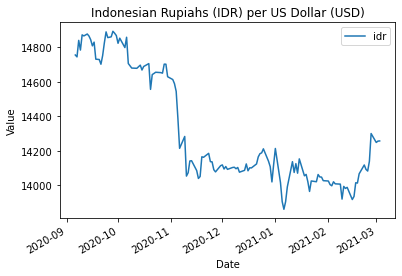

In [34]:
exchangerate.plot(xlabel='Date',ylabel='Value',title='Indonesian Rupiahs (IDR) per US Dollar (USD)')

1. Dilihat dari visualisasi diatas, maka dapat disimpukan bahwa terjadi penurunan yang cukup signifikan pada nilai pertukaran mata uang USD dari bulan September 2020 sampai dengan Maret 2021. 

2. Pada pembukaan tahun 2021 pada awal bulan Januari adalah titik terendah nilai tukar USD terhadap Indonesian Rupiah selama 9 bulan terakhir. Indonesian Rupiah menguat dan nilai tukarnya dibawah 14.000 rupiah per US Dollar. 

3. Namun pada pertengahan bukan Februari 2021 mata uang USD perlahan-lahan mulai kembali menguat walaupun masih relatively low dibandingkan dengan nilai USD pada September 2020. 


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.